In [1]:
import glob, os, json, re, unicodedata
from bs4 import BeautifulSoup


load_verbose = 0
loaded_labels = []
loaded_text = []
labels = {"Barack Obama": 0,
          "Donald J. Trump": 1,
          "Dwight D. Eisenhower": 2,
          "Franklin D. Roosevelt": 3,
          "George Bush": 4,
          "George W. Bush": 5,
          "Gerald R. Ford": 6,
          "Harry S. Truman": 7,
          "Herbert Hoover": 8,
          "Jimmy Carter": 9,
          "John F. Kennedy": 10,
          "Lyndon B. Johnson": 11,
          "Richard Nixon": 12,
          "Ronald Reagan": 13,
          "William J. Clinton": 14}

# load raw text files straight in, no parsing
file_to_label = {"Obama": "Barack Obama", 
                     "Trump": "Donald J. Trump",
                     "Eisenhower": "Dwight D. Eisenhower",
                     "Roosevelt": "Franklin D. Roosevelt",
                     "Bush": "George Bush",
                     "WBush": "George W. Bush",
                     "Ford": "Gerald R. Ford",
                     "Truman": "Harry S. Truman",
                     "Hoover": "Herbert Hoover",
                     "Carter": "Jimmy Carter",
                     "Kennedy": "John F. Kennedy",
                     "Johnson": "Lyndon B. Johnson",
                     "Nixon": "Richard Nixon",
                     "Reagan": "Ronald Reagan",
                     "Clinton": "William J. Clinton"
                    }

directory = "../data/processed/"
for filename in glob.glob(os.path.join(directory, '*.txt')):
        arr = filename.replace(directory,'').split("_")
        loaded_labels = loaded_labels + [labels[file_to_label[arr[0]]]]
        raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
        loaded_text = loaded_text + [raw] 

print "Loaded", len(loaded_text), "speeches for", len(set(loaded_labels)), "presidents."
# processed2 now contains files generated from unprocessed
directory = "../data/processed3/"
for filename in glob.glob(os.path.join(directory, '*.txt')):
        arr = filename.replace(directory,'').split("_")
        loaded_labels = loaded_labels + [labels[file_to_label[arr[0]]]]
        raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
        loaded_text = loaded_text + [raw] 


print "Loaded", len(loaded_text), "speeches for", len(set(loaded_labels)), "presidents."

Loaded 25 speeches for 2 presidents.
Loaded 1742 speeches for 15 presidents.


In [2]:
import numpy as np
# summary stats & chop up into smaller
#print "Loaded", len(input_text), "speeches for", len(set(input_labels)), "presidents."

print "\nHow many speeches per president?"
speech_freq = np.bincount(loaded_labels)
for key, value in sorted(labels.iteritems()):
    print str(value).ljust(2), ":", key.ljust(20), "\t", speech_freq[value]
  
print "\nApproximately many words of text per president?"
vocab = set()
for key, value in sorted(labels.iteritems()):
    label_set = [cnt for cnt, idx in enumerate(loaded_labels) if idx == value]
    label_speeches = [loaded_text[i] for i in label_set]
    print str(value).ljust(2), ":", key.ljust(20), "\t", sum(len(speech.split()) for speech in label_speeches)


print "\nApproximately how many average words per speech per president?"
for key, value in sorted(labels.iteritems()):
    label_set = [cnt for cnt, idx in enumerate(loaded_labels) if idx == value]
    label_speeches = [loaded_text[i] for i in label_set]
    print str(value).ljust(2), ":", key.ljust(20), "\t", (sum(len(speech.split()) for speech in label_speeches)) / speech_freq[value]



How many speeches per president?
0  : Barack Obama         	148
1  : Donald J. Trump      	17
2  : Dwight D. Eisenhower 	192
3  : Franklin D. Roosevelt 	223
4  : George Bush          	97
5  : George W. Bush       	54
6  : Gerald R. Ford       	40
7  : Harry S. Truman      	301
8  : Herbert Hoover       	267
9  : Jimmy Carter         	59
10 : John F. Kennedy      	63
11 : Lyndon B. Johnson    	134
12 : Richard Nixon        	39
13 : Ronald Reagan        	46
14 : William J. Clinton   	62

Approximately many words of text per president?
0  : Barack Obama         	858771
1  : Donald J. Trump      	80212
2  : Dwight D. Eisenhower 	569796
3  : Franklin D. Roosevelt 	386250
4  : George Bush          	348692
5  : George W. Bush       	313253
6  : Gerald R. Ford       	125657
7  : Harry S. Truman      	377745
8  : Herbert Hoover       	158317
9  : Jimmy Carter         	224316
10 : John F. Kennedy      	239948
11 : Lyndon B. Johnson    	420226
12 : Richard Nixon        	177240
13 : Ronald Reagan

In [3]:
import nltk.data
from scipy import stats

# parse speeches into sentences and see what we have
input_text = []
input_labels = []

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
for idx in range(0,len(loaded_text)):
    speech = loaded_text[idx]
    label = loaded_labels[idx]
    parsed_sentences = sent_detector.tokenize(speech.strip())
    input_text = input_text + parsed_sentences
    input_labels = input_labels + ([label]*len(parsed_sentences))

print "Parsed ", len(input_text), "sentences, applying", len(input_labels), "labels."

print "\nHow many sentences of text per president?"
sentence_label_count = np.bincount(input_labels)
for key, value in sorted(labels.iteritems()):
    print str(value).ljust(2), ":", key.ljust(20), "\t", sentence_label_count[value]

print "\nSummary stats of sentence counts"
print stats.describe(sentence_label_count)

max_sentence_len_char = len(max(input_text, key=len))
max_sentence_len_word = len(max(input_text, key=len).split())

print "\nMaximum sentence length (characters):", max_sentence_len_char
print "Maximum sentence length (words):", max_sentence_len_word
print "\nLongest sentence:", max(input_text, key=len)

Parsed  261450 sentences, applying 261450 labels.

How many sentences of text per president?
0  : Barack Obama         	42301
1  : Donald J. Trump      	6648
2  : Dwight D. Eisenhower 	24844
3  : Franklin D. Roosevelt 	25746
4  : George Bush          	21344
5  : George W. Bush       	20148
6  : Gerald R. Ford       	6143
7  : Harry S. Truman      	30227
8  : Herbert Hoover       	6762
9  : Jimmy Carter         	10872
10 : John F. Kennedy      	10635
11 : Lyndon B. Johnson    	23345
12 : Richard Nixon        	7443
13 : Ronald Reagan        	8972
14 : William J. Clinton   	16020

Summary stats of sentence counts
DescribeResult(nobs=15, minmax=(6143, 42301), mean=17430.0, variance=113146199.0, skewness=0.7767737562448209, kurtosis=-0.1275293804195572)

Maximum sentence length (characters): 1364
Maximum sentence length (words): 245

Longest sentence: And throughout this process, based on hours of meetingsif you tallied it up, days or weeks of meetings where we went through every option in 

In [4]:
# adjust sentence volumes 
from operator import itemgetter 

# approach here is too simplistic but it suffices for now:
#   If <= threshold, take all; else just pick first threshold # of sentences sentences

sentence_max_threshold = 10000

trimmed_text = []
trimmed_labels = []
sentence_label_count = np.bincount(input_labels)

for key, value in sorted(labels.iteritems()):
    # grab all values of a specific label
    subset_text = list(itemgetter(*[idx for idx, label in enumerate(input_labels) if label == value ])(input_text))
    subset_labels = list(itemgetter(*[idx for idx, label in enumerate(input_labels) if label == value ])(input_labels))

    if sentence_label_count[value] <= sentence_max_threshold:
        print str(value).ljust(2), ":", key.ljust(20), "\t", "copy", "\t", str(sentence_label_count[value]).ljust(6), "now at:", len(subset_text)
    else:
        subset_text = subset_text[0:sentence_max_threshold]
        subset_labels = subset_labels[0:sentence_max_threshold]
        print str(value).ljust(2), ":", key.ljust(20), "\t", "trim", "\t", str(sentence_label_count[value]).ljust(6), "now at:", len(subset_text)
    trimmed_text = trimmed_text + subset_text
    trimmed_labels = trimmed_labels + subset_labels

# free up some memory
subset_labels = None
subset_text = None

print "\nSentences trimmed from", len(input_text), "to", len(trimmed_text)
print "\nLabels trimmed from", len(input_labels), "to", len(trimmed_labels)

0  : Barack Obama         	trim 	42301  now at: 10000
1  : Donald J. Trump      	copy 	6648   now at: 6648
2  : Dwight D. Eisenhower 	trim 	24844  now at: 10000
3  : Franklin D. Roosevelt 	trim 	25746  now at: 10000
4  : George Bush          	trim 	21344  now at: 10000
5  : George W. Bush       	trim 	20148  now at: 10000
6  : Gerald R. Ford       	copy 	6143   now at: 6143
7  : Harry S. Truman      	trim 	30227  now at: 10000
8  : Herbert Hoover       	copy 	6762   now at: 6762
9  : Jimmy Carter         	trim 	10872  now at: 10000
10 : John F. Kennedy      	trim 	10635  now at: 10000
11 : Lyndon B. Johnson    	trim 	23345  now at: 10000
12 : Richard Nixon        	copy 	7443   now at: 7443
13 : Ronald Reagan        	copy 	8972   now at: 8972
14 : William J. Clinton   	trim 	16020  now at: 10000

Sentences trimmed from 261450 to 135968

Labels trimmed from 261450 to 135968


In [5]:
## USE NLTK Tokenizer instead?

from sklearn.cross_validation import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

#max_words = len(tokenizer.word_counts) #15000

tokenizer = Tokenizer(num_words=None, #max_words, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, split=" ", char_level=False)
tokenizer.fit_on_texts(trimmed_text)
tokenized_text = tokenizer.texts_to_sequences(trimmed_text)


X = sequence.pad_sequences(tokenized_text, maxlen=max_sentence_len_word)
y = to_categorical(trimmed_labels)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=45)

print "Prepared training (", len(train_X), "records) and test (", len(test_X), "records) data sets."

/home/thongnbui/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


Prepared training ( 108774 records) and test ( 27194 records) data sets.


In [6]:
import collections

print X.shape, y.shape, train_X.shape, train_y.shape, len(tokenizer.word_counts), len(tokenized_text)

x_count = collections.Counter()
for i in range(len(test_y)):
    x_count.update({str(test_y[i]): 1})

for key, value in sorted(x_count.iteritems(), reverse=True):
    print key, value, float(value)/sentence_max_threshold


(135968, 245) (135968, 15) (108774, 245) (108774, 15) 32836 135968
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1965 0.1965
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1318 0.1318
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1974 0.1974
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1982 0.1982
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1962 0.1962
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 2022 0.2022
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] 1207 0.1207
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.] 2015 0.2015
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.] 1388 0.1388
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] 2013 0.2013
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] 2056 0.2056
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.] 1936 0.1936
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

### This trained model is now implemented in Keras_Sentence_RNN.py to avoid time-out problem
After it's run, the trained model will be loaded and validated as below

In [12]:
'''
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, SimpleRNN, Dropout

max_features = len(tokenizer.word_counts) + 1 #15000
batch_size = 100

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 100, input_length=max_sentence_len_word))
#model.add(Dropout(0.5))
model.add(SimpleRNN(100,input_dim=100,activation='tanh',return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(50,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
#model.add(Dense(64, input_dim=64,
#                kernel_regularizer=regularizers.l2(0.01),
#                activity_regularizer=regularizers.l1(0.01)))
model.compile(loss='categorical_crossentropy', optimizer='Adagrad',metrics=['categorical_accuracy'])
print(model.summary())

model.fit(train_X, y=train_y, batch_size=batch_size, nb_epoch=1, verbose=1)
'''

"\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation, Embedding, SimpleRNN, Dropout\n\nmax_features = len(tokenizer.word_counts) + 1 #15000\nbatch_size = 100\n\nprint('Build model...')\nmodel = Sequential()\nmodel.add(Embedding(max_features, 100, input_length=max_sentence_len_word))\n#model.add(Dropout(0.5))\nmodel.add(SimpleRNN(100,input_dim=100,activation='tanh',return_sequences=True))\nmodel.add(Dropout(0.5))\nmodel.add(SimpleRNN(50,activation='tanh'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(15, activation='softmax'))\n#model.add(Dense(64, input_dim=64,\n#                kernel_regularizer=regularizers.l2(0.01),\n#                activity_regularizer=regularizers.l1(0.01)))\nmodel.compile(loss='categorical_crossentropy', optimizer='Adagrad',metrics=['categorical_accuracy'])\nprint(model.summary())\n\nmodel.fit(train_X, y=train_y, batch_size=batch_size, nb_epoch=1, verbose=1)\n"

In [13]:
from keras.models import load_model

# Using model trained with 40 epochs
model = load_model('model_40.h5')

In [14]:
# Evaluate performance
batch_size = 100

print "Evaluating test data..."
loss_and_metrics = model.evaluate(test_X, test_y)
print model.metrics_names
print loss_and_metrics

# Make some predictions
print "\nPredicting using test data..."
pred_y = model.predict(test_X, batch_size=batch_size, verbose=1)
pred_y_collapsed = np.argmax(pred_y, axis=1)
test_y_collapsed = np.argmax(test_y, axis=1)

print "Done prediction."

Evaluating test data...
27194/27194 [==============================] - 64s      

Confusion matrix, without normalization
[[ 923  164   22   57   86  227   35   39   18   87   30   17   26   56
   178]
 [ 128  642   20   65   62  175   14   71   14   10    4   11   18   29
    55]
 [  18   27  794  165   47   25   17  275   46   39  181   90   83  108
    59]
 [  20   83  159 1079   26   42    4  186  133   35   61   52   17   58
    27]
 [  60   69   65   56  681  187  102  122   12  107   40   54   37  165
   205]
 [ 213  135   24   59  175  894   33   80   12   63   18   28   17   78
   193]
 [  34   19   49   36   87   22  319   77   25  125   91  118  116   43
    46]
 [   8   49  167  151   67   28   15 1075   71   27   49  176   37   63
    32]
 [  20   27   66  163    5    9   12  132  652   25   99  102   55   17
     4]
 [ 100   27   62   49  118   42  121   66   25  829  155   93   50  176
   100]
 [  35   20  221   81   38   20   63  138   47  186  754  137  155  100
    61]
 [  40   37  110   99   67   27   76  273   84   77  130  717  115   58
    26]


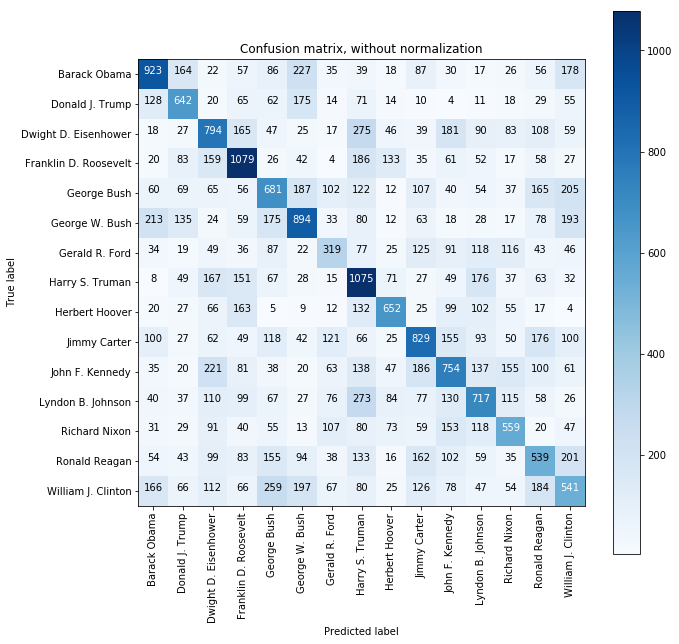

In [15]:
# from scikit-learn examples @
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y_collapsed, pred_y_collapsed)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=(sorted(labels, key=labels.get)),
                      title='Confusion matrix, without normalization')

# #Plot normalized confusion matrix
# plt.figure(figsize=(10,10))
# plot_confusion_matrix(cnf_matrix, classes=(sorted(labels, key=labels.get)), normalize=True,
#                       title='Normalized confusion matrix')

plt.show()